# UAVÂíåÂú∞Èù¢Áî®Êà∑ÁÆ°ÁêÜÊµãËØï

Êú¨notebookÁî®‰∫éÊµãËØïÂíåÁÆ°ÁêÜUAVÂíåÂú∞Èù¢Áî®Êà∑ÁöÑÂäüËÉΩ„ÄÇ

## ÁõÆÂΩï
1. Ê®°ÂùóÂØºÂÖ•ÂíåËÆæÁΩÆ
2. Ground UsersÊµãËØï
   - Âü∫Á°ÄÂäüËÉΩÊµãËØï
   - ‰ΩçÁΩÆÂíåË∑ùÁ¶ªËÆ°ÁÆóÊµãËØï
   - ÂêûÂêêÈáèÁÆ°ÁêÜÊµãËØï
3. UserManagerÊµãËØï
   - Áî®Êà∑ÁîüÊàêÂíåÁÆ°ÁêÜ
   - Âõ∫ÂÆö‰ΩçÁΩÆÁî®Êà∑ÊµãËØï
   - ÂêûÂêêÈáèÁªüËÆ°ÊµãËØï
4. UAVÊµãËØï
   - Âü∫Á°ÄÂäüËÉΩÊµãËØï
   - ÁßªÂä®ÂíåÈÄüÂ∫¶ÊéßÂà∂ÊµãËØï
   - ËΩ®ËøπËÆ∞ÂΩïÊµãËØï
5. Á≥ªÁªüÈõÜÊàêÊµãËØï
   - UAVÂíåÁî®Êà∑‰∫§‰∫íÊµãËØï
   - ËæπÁïåÊù°‰ª∂ÊµãËØï


In [1]:
# 1. Ê®°ÂùóÂØºÂÖ•ÂíåËÆæÁΩÆ
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set_style("whitegrid")
except ImportError:
    print("Warning: seaborn not found, using default matplotlib style")
from typing import List, Tuple, Optional
import warnings
warnings.filterwarnings('ignore')

# Ê∑ªÂä†srcÁõÆÂΩïÂà∞PythonË∑ØÂæÑ
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

from environment.users import GroundUser, UserManager
from environment.uav import UAV

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê‰ª•‰øùËØÅÂèØÈáçÂ§çÊÄß
np.random.seed(42)

# ËÆæÁΩÆmatplotlib‰∏≠ÊñáÊòæÁ§∫
plt.rcParams['font.sans-serif'] = ['SimHei']  # Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫‰∏≠ÊñáÊ†áÁ≠æ
plt.rcParams['axes.unicode_minus'] = False  # Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑


## 2. Ground UsersÊµãËØï

### 2.1 Âü∫Á°ÄÂäüËÉΩÊµãËØï
ÊµãËØïGroundUserÁ±ªÁöÑÂü∫Êú¨ÂäüËÉΩÔºåÂåÖÊã¨Ôºö
- ÂàõÂª∫Áî®Êà∑
- Ëé∑Âèñ‰ΩçÁΩÆ
- ËÆ°ÁÆóË∑ùÁ¶ª
- ÂêûÂêêÈáèËÆ∞ÂΩïÂíåÁªüËÆ°


In [2]:
def test_ground_user_basic():
    """ÊµãËØïGroundUserÁöÑÂü∫Êú¨ÂäüËÉΩ"""
    print("üß™ ÊµãËØïGroundUserÂü∫Êú¨ÂäüËÉΩ")
    print("="*50)
    
    # ÂàõÂª∫Áî®Êà∑
    user1 = GroundUser((10.0, 20.0, 5.0), user_id=1)
    user2 = GroundUser((30.0, 40.0, 0.0), user_id=2)
    
    # ÊµãËØï‰ΩçÁΩÆËé∑ÂèñÂíåzÂùêÊ†áÂº∫Âà∂‰∏∫0
    print(f"üìç Áî®Êà∑1‰ΩçÁΩÆ: {user1.get_position()}")
    print(f"üìç Áî®Êà∑2‰ΩçÁΩÆ: {user2.get_position()}")
    assert user1.get_position()[2] == 0, "Áî®Êà∑zÂùêÊ†áÂ∫îËØ•‰∏∫0"
    
    # ÊµãËØïË∑ùÁ¶ªËÆ°ÁÆó
    distance = user1.distance_to(user2.get_position())
    print(f"üìè Áî®Êà∑Èó¥Ë∑ùÁ¶ª: {distance:.2f} Á±≥")
    expected_distance = np.sqrt((30-10)**2 + (40-20)**2)
    assert abs(distance - expected_distance) < 1e-6, "Ë∑ùÁ¶ªËÆ°ÁÆóÈîôËØØ"
    
    # ÊµãËØïÂêûÂêêÈáèËÆ∞ÂΩï
    throughputs = [1.5, 2.3, 1.8, 2.1, 1.9]
    for tp in throughputs:
        user1.add_throughput(tp)
    print(f"üìä Áî®Êà∑1ÂêûÂêêÈáèÂéÜÂè≤: {user1.throughput_history}")
    print(f"üìà Áî®Êà∑1Âπ≥ÂùáÂêûÂêêÈáè: {user1.get_average_throughput():.2f}")
    assert abs(user1.get_average_throughput() - np.mean(throughputs)) < 1e-6, "Âπ≥ÂùáÂêûÂêêÈáèËÆ°ÁÆóÈîôËØØ"
    
    # ÊµãËØïÂêûÂêêÈáèÈáçÁΩÆ
    user1.reset_throughput_history()
    print(f"üîÑ ÈáçÁΩÆÂêéÂêûÂêêÈáèÂéÜÂè≤: {user1.throughput_history}")
    assert len(user1.throughput_history) == 0, "ÂêûÂêêÈáèÂéÜÂè≤Êú™Ê≠£Á°ÆÈáçÁΩÆ"
    
    print("‚úÖ Âü∫Á°ÄÂäüËÉΩÊµãËØïÈÄöËøáÔºÅ\n")

# ËøêË°åÊµãËØï
test_ground_user_basic()


üß™ ÊµãËØïGroundUserÂü∫Êú¨ÂäüËÉΩ
üìç Áî®Êà∑1‰ΩçÁΩÆ: [10. 20.  0.]
üìç Áî®Êà∑2‰ΩçÁΩÆ: [30. 40.  0.]
üìè Áî®Êà∑Èó¥Ë∑ùÁ¶ª: 28.28 Á±≥
üìä Áî®Êà∑1ÂêûÂêêÈáèÂéÜÂè≤: [1.5, 2.3, 1.8, 2.1, 1.9]
üìà Áî®Êà∑1Âπ≥ÂùáÂêûÂêêÈáè: 1.92
üîÑ ÈáçÁΩÆÂêéÂêûÂêêÈáèÂéÜÂè≤: []
‚úÖ Âü∫Á°ÄÂäüËÉΩÊµãËØïÈÄöËøáÔºÅ



### 2.2 ‰ΩçÁΩÆÂíåË∑ùÁ¶ªÂèØËßÜÂåñÊµãËØï
ÊµãËØïÂíåÂèØËßÜÂåñÁî®Êà∑‰ΩçÁΩÆÂíåË∑ùÁ¶ªËÆ°ÁÆóÔºö
- ÂàõÂª∫Â§ö‰∏™Áî®Êà∑
- ÂèØËßÜÂåñÁî®Êà∑‰ΩçÁΩÆ
- ËÆ°ÁÆóÂíåÊòæÁ§∫Áî®Êà∑Èó¥Ë∑ùÁ¶ª


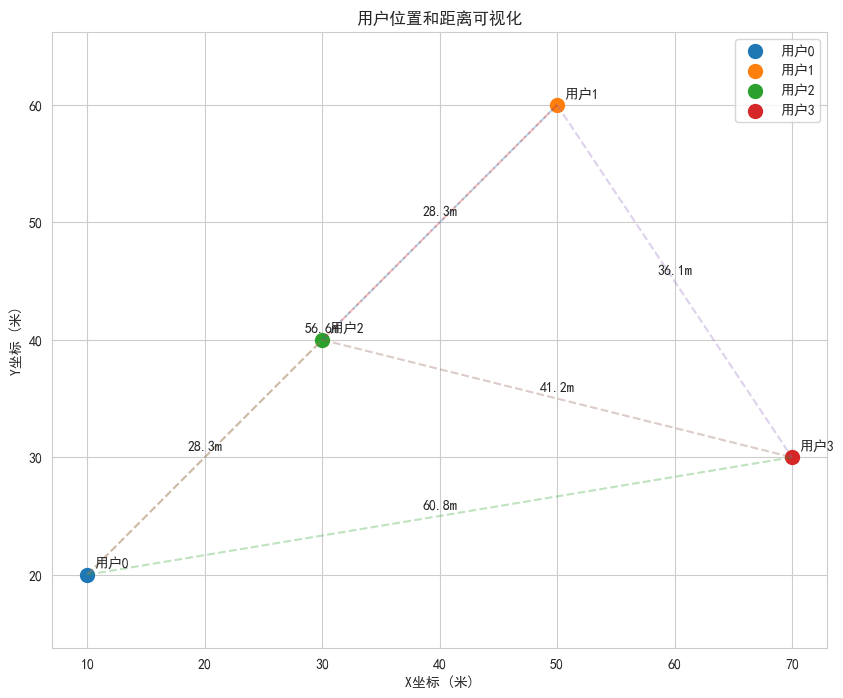

In [3]:
def visualize_users_and_distances():
    """ÂèØËßÜÂåñÁî®Êà∑‰ΩçÁΩÆÂíåË∑ùÁ¶ª"""
    # ÂàõÂª∫Â§ö‰∏™Áî®Êà∑
    users = [
        GroundUser((10, 20, 0), 0),
        GroundUser((50, 60, 0), 1),
        GroundUser((30, 40, 0), 2),
        GroundUser((70, 30, 0), 3)
    ]
    
    # ÂàõÂª∫ÂõæÂΩ¢
    plt.figure(figsize=(10, 8))
    
    # ÁªòÂà∂Áî®Êà∑‰ΩçÁΩÆ
    for user in users:
        pos = user.get_position()
        plt.scatter(pos[0], pos[1], s=100, label=f'Áî®Êà∑{user.user_id}')
        plt.annotate(f'Áî®Êà∑{user.user_id}', (pos[0], pos[1]), 
                    xytext=(5, 5), textcoords='offset points')
    
    # ËÆ°ÁÆóÂπ∂ÊòæÁ§∫Áî®Êà∑Èó¥Ë∑ùÁ¶ª
    for i, user1 in enumerate(users):
        for j, user2 in enumerate(users[i+1:], i+1):
            distance = user1.distance_to(user2.get_position())
            mid_x = (user1.position[0] + user2.position[0]) / 2
            mid_y = (user1.position[1] + user2.position[1]) / 2
            plt.plot([user1.position[0], user2.position[0]], 
                    [user1.position[1], user2.position[1]], '--', alpha=0.3)
            plt.annotate(f'{distance:.1f}m', (mid_x, mid_y), 
                        xytext=(0, 5), textcoords='offset points', ha='center')
    
    plt.title('Áî®Êà∑‰ΩçÁΩÆÂíåË∑ùÁ¶ªÂèØËßÜÂåñ')
    plt.xlabel('XÂùêÊ†á (Á±≥)')
    plt.ylabel('YÂùêÊ†á (Á±≥)')
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.show()

# ËøêË°åÂèØËßÜÂåñ
visualize_users_and_distances()


## 3. UserManagerÊµãËØï

### 3.1 Áî®Êà∑ÁîüÊàêÂíåÁÆ°ÁêÜÊµãËØï
ÊµãËØïUserManagerÁ±ªÁöÑÂäüËÉΩÔºö
- ÈöèÊú∫Áî®Êà∑ÁîüÊàê
- Âõ∫ÂÆö‰ΩçÁΩÆÁî®Êà∑ËÆæÁΩÆ
- Áî®Êà∑Êü•ËØ¢ÂíåÁÆ°ÁêÜ
- ÂêûÂêêÈáèÁªüËÆ°


In [4]:
def test_user_manager():
    """ÊµãËØïUserManagerÁöÑÂäüËÉΩ"""
    print("üß™ ÊµãËØïUserManagerÂäüËÉΩ")
    print("="*50)
    
    # ÂàõÂª∫UserManagerÂÆû‰æã
    manager = UserManager(num_users=4)
    
    # ÊµãËØïÈöèÊú∫Áî®Êà∑ÁîüÊàê
    print("\nüìç ÊµãËØïÈöèÊú∫Áî®Êà∑ÁîüÊàê")
    manager.generate_random_users(x_range=(0, 100), y_range=(0, 100), seed=42)
    positions = manager.get_user_positions()
    print(f"ÁîüÊàêÁöÑÁî®Êà∑‰ΩçÁΩÆ:\n{positions}")
    assert len(manager.users) == 4, "Áî®Êà∑Êï∞Èáè‰∏çÊ≠£Á°Æ"
    
    # ÊµãËØïÂõ∫ÂÆö‰ΩçÁΩÆÁî®Êà∑ËÆæÁΩÆ
    print("\nüìå ÊµãËØïÂõ∫ÂÆö‰ΩçÁΩÆÁî®Êà∑ËÆæÁΩÆ")
    fixed_positions = np.array([
        [10, 20, 0],
        [30, 40, 0],
        [50, 60, 0],
        [70, 80, 0]
    ])
    manager.set_fixed_users(fixed_positions)
    new_positions = manager.get_user_positions()
    print(f"ËÆæÁΩÆÁöÑÂõ∫ÂÆö‰ΩçÁΩÆ:\n{new_positions}")
    assert np.allclose(new_positions, fixed_positions), "Âõ∫ÂÆö‰ΩçÁΩÆËÆæÁΩÆÂ§±Ë¥•"
    
    # ÊµãËØïÁî®Êà∑Êü•ËØ¢
    print("\nüîç ÊµãËØïÁî®Êà∑Êü•ËØ¢")
    user = manager.get_user_by_id(2)
    print(f"Êü•ËØ¢Áî®Êà∑2ÁöÑ‰ΩçÁΩÆ: {user.get_position()}")
    assert np.allclose(user.get_position(), fixed_positions[2]), "Áî®Êà∑Êü•ËØ¢ÁªìÊûúÈîôËØØ"
    
    # ÊµãËØïÂêûÂêêÈáèÁÆ°ÁêÜ
    print("\nüìä ÊµãËØïÂêûÂêêÈáèÁÆ°ÁêÜ")
    throughputs = {
        0: [1.5, 2.0, 1.8],
        1: [2.1, 2.3, 2.2],
        2: [1.9, 1.7, 1.8],
        3: [2.4, 2.2, 2.3]
    }
    
    for user_id, tps in throughputs.items():
        for tp in tps:
            manager.add_throughput_to_user(user_id, tp)
    
    total_throughput = manager.get_total_throughput()
    print(f"ÊÄªÂêûÂêêÈáè: {total_throughput:.2f}")
    
    # È™åËØÅÊÄªÂêûÂêêÈáè
    expected_total = sum(np.mean(tps) for tps in throughputs.values())
    assert abs(total_throughput - expected_total) < 1e-6, "ÊÄªÂêûÂêêÈáèËÆ°ÁÆóÈîôËØØ"
    
    # ÊµãËØïÂêûÂêêÈáèÈáçÁΩÆ
    print("\nüîÑ ÊµãËØïÂêûÂêêÈáèÈáçÁΩÆ")
    manager.reset_all_throughput_history()
    new_total = manager.get_total_throughput()
    print(f"ÈáçÁΩÆÂêéÊÄªÂêûÂêêÈáè: {new_total:.2f}")
    assert new_total == 0, "ÂêûÂêêÈáèÈáçÁΩÆÂ§±Ë¥•"
    
    # ÊµãËØïÊúÄÂ∞èË∑ùÁ¶ªËÆ°ÁÆó
    print("\nüìè ÊµãËØïÊúÄÂ∞èË∑ùÁ¶ªËÆ°ÁÆó")
    test_point = np.array([40, 50, 30])
    min_dist = manager.get_minimum_distance_to_users(test_point)
    print(f"Âà∞ÊµãËØïÁÇπÁöÑÊúÄÂ∞èË∑ùÁ¶ª: {min_dist:.2f}Á±≥")
    
    print("\n‚úÖ UserManagerÊµãËØïÈÄöËøáÔºÅ")

# ËøêË°åÊµãËØï
test_user_manager()


üß™ ÊµãËØïUserManagerÂäüËÉΩ

üìç ÊµãËØïÈöèÊú∫Áî®Êà∑ÁîüÊàê
ÁîüÊàêÁöÑÁî®Êà∑‰ΩçÁΩÆ:
[[37.45401  95.071434  0.      ]
 [73.199394 59.86585   0.      ]
 [15.601864 15.599452  0.      ]
 [ 5.808361 86.617615  0.      ]]

üìå ÊµãËØïÂõ∫ÂÆö‰ΩçÁΩÆÁî®Êà∑ËÆæÁΩÆ
ËÆæÁΩÆÁöÑÂõ∫ÂÆö‰ΩçÁΩÆ:
[[10. 20.  0.]
 [30. 40.  0.]
 [50. 60.  0.]
 [70. 80.  0.]]

üîç ÊµãËØïÁî®Êà∑Êü•ËØ¢
Êü•ËØ¢Áî®Êà∑2ÁöÑ‰ΩçÁΩÆ: [50. 60.  0.]

üìä ÊµãËØïÂêûÂêêÈáèÁÆ°ÁêÜ
ÊÄªÂêûÂêêÈáè: 8.07

üîÑ ÊµãËØïÂêûÂêêÈáèÈáçÁΩÆ
ÈáçÁΩÆÂêéÊÄªÂêûÂêêÈáè: 0.00

üìè ÊµãËØïÊúÄÂ∞èË∑ùÁ¶ªËÆ°ÁÆó
Âà∞ÊµãËØïÁÇπÁöÑÊúÄÂ∞èË∑ùÁ¶ª: 33.17Á±≥

‚úÖ UserManagerÊµãËØïÈÄöËøáÔºÅ


## 4. UAVÊµãËØï

### 4.1 UAVÂü∫Á°ÄÂäüËÉΩÊµãËØï
ÊµãËØïUAVÁ±ªÁöÑÂü∫Êú¨ÂäüËÉΩÔºö
- ÂàùÂßãÂåñÂíå‰ΩçÁΩÆËÆæÁΩÆ
- ÈÄüÂ∫¶ÊéßÂà∂
- ËæπÁïåÁ∫¶Êùü
- È´òÂ∫¶Áª¥ÊåÅ


In [5]:
def test_uav_basic():
    """ÊµãËØïUAVÁöÑÂü∫Êú¨ÂäüËÉΩ"""
    print("üß™ ÊµãËØïUAVÂü∫Êú¨ÂäüËÉΩ")
    print("="*50)
    
    # ÂàõÂª∫UAVÂÆû‰æã
    start_pos = (20, 30, 50)
    uav = UAV(start_position=start_pos,
              num_antennas=8,
              max_speed=30.0,
              min_speed=10.0,
              transmit_power=0.5,
              env_bounds=(100, 100, 100))
    
    # ÊµãËØïÂàùÂßãÂåñ
    print("\nüìç ÊµãËØïÂàùÂßãÂåñ")
    print(f"ÂàùÂßã‰ΩçÁΩÆ: {uav.get_position()}")
    print(f"ÂàùÂßãÈÄüÂ∫¶: {uav.get_velocity()}")
    assert np.allclose(uav.get_position(), start_pos), "ÂàùÂßã‰ΩçÁΩÆËÆæÁΩÆÈîôËØØ"
    assert np.allclose(uav.get_velocity(), [0, 0, 0]), "ÂàùÂßãÈÄüÂ∫¶Â∫î‰∏∫0"
    
    # ÊµãËØïÁßªÂä®
    print("\nüöÅ ÊµãËØïÁßªÂä®")
    direction = np.array([1.0, 0.0])  # ÂêëxËΩ¥Ê≠£ÊñπÂêëÁßªÂä®
    speed = 20.0
    uav.move(direction, speed, time_step=1.0)
    new_pos = uav.get_position()
    new_vel = uav.get_velocity()
    print(f"ÁßªÂä®Âêé‰ΩçÁΩÆ: {new_pos}")
    print(f"ÁßªÂä®ÂêéÈÄüÂ∫¶: {new_vel}")
    
    # È™åËØÅÁßªÂä®ÂêéÁöÑ‰ΩçÁΩÆÂíåÈÄüÂ∫¶
    expected_x = start_pos[0] + speed * 1.0  # 1ÁßíÂêéÁöÑÈ¢ÑÊúüxÂùêÊ†á
    assert abs(new_pos[0] - expected_x) < 1e-6, "xÊñπÂêëÁßªÂä®Ë∑ùÁ¶ªÈîôËØØ"
    assert new_pos[2] == start_pos[2], "È´òÂ∫¶Â∫îËØ•‰øùÊåÅ‰∏çÂèò"
    
    # ÊµãËØïËæπÁïåÁ∫¶Êùü
    print("\nüöß ÊµãËØïËæπÁïåÁ∫¶Êùü")
    # Â∞ùËØïÁßªÂä®Âà∞ËæπÁïåÂ§ñ
    direction = np.array([1.0, 1.0])
    uav.move(direction, speed * 10, time_step=5.0)  # Â§ßÈÄüÂ∫¶ÔºåÈïøÊó∂Èó¥
    constrained_pos = uav.get_position()
    print(f"Á∫¶ÊùüÂêé‰ΩçÁΩÆ: {constrained_pos}")
    assert all(0 <= p <= b for p, b in zip(constrained_pos, uav.env_bounds)), "‰ΩçÁΩÆË∂ÖÂá∫ËæπÁïå"
    
    # ÊµãËØïÈÄüÂ∫¶ÈôêÂà∂
    print("\n‚ö° ÊµãËØïÈÄüÂ∫¶ÈôêÂà∂")
    # Â∞ùËØï‰ΩøÁî®Ë∂ÖËøáÊúÄÂ§ßÈÄüÂ∫¶ÁöÑÈÄüÂ∫¶
    direction = np.array([1.0, 0.0])
    uav.move(direction, uav.max_speed * 2, time_step=1.0)
    limited_vel = uav.get_velocity()
    print(f"ÈôêÂà∂ÂêéÈÄüÂ∫¶: {limited_vel}")
    assert np.linalg.norm(limited_vel[:2]) <= uav.max_speed, "ÈÄüÂ∫¶Ë∂ÖËøáÊúÄÂ§ßÈôêÂà∂"
    
    # ÊµãËØïÈáçÁΩÆ
    print("\nüîÑ ÊµãËØïÈáçÁΩÆ")
    uav.reset()
    reset_pos = uav.get_position()
    reset_vel = uav.get_velocity()
    print(f"ÈáçÁΩÆÂêé‰ΩçÁΩÆ: {reset_pos}")
    print(f"ÈáçÁΩÆÂêéÈÄüÂ∫¶: {reset_vel}")
    assert np.allclose(reset_vel, [0, 0, 0]), "ÈáçÁΩÆÂêéÈÄüÂ∫¶Â∫î‰∏∫0"
    assert reset_pos[2] == start_pos[2], "ÈáçÁΩÆÂêéÈ´òÂ∫¶Â∫î‰øùÊåÅ‰∏çÂèò"
    
    print("\n‚úÖ UAVÂü∫Êú¨ÂäüËÉΩÊµãËØïÈÄöËøáÔºÅ")

# ËøêË°åÊµãËØï
test_uav_basic()


üß™ ÊµãËØïUAVÂü∫Êú¨ÂäüËÉΩ

üìç ÊµãËØïÂàùÂßãÂåñ
ÂàùÂßã‰ΩçÁΩÆ: [20. 30. 50.]
ÂàùÂßãÈÄüÂ∫¶: [0. 0. 0.]

üöÅ ÊµãËØïÁßªÂä®
ÁßªÂä®Âêé‰ΩçÁΩÆ: [40. 30. 50.]
ÁßªÂä®ÂêéÈÄüÂ∫¶: [20.  0.  0.]

üöß ÊµãËØïËæπÁïåÁ∫¶Êùü
Á∫¶ÊùüÂêé‰ΩçÁΩÆ: [100. 100.  50.]

‚ö° ÊµãËØïÈÄüÂ∫¶ÈôêÂà∂
ÈôêÂà∂ÂêéÈÄüÂ∫¶: [30.  0.  0.]

üîÑ ÊµãËØïÈáçÁΩÆ
ÈáçÁΩÆÂêé‰ΩçÁΩÆ: [ 0.  0. 50.]
ÈáçÁΩÆÂêéÈÄüÂ∫¶: [0. 0. 0.]

‚úÖ UAVÂü∫Êú¨ÂäüËÉΩÊµãËØïÈÄöËøáÔºÅ


### 4.2 UAVËΩ®ËøπÊµãËØïÂíåÂèØËßÜÂåñ
ÊµãËØïUAVÁöÑËΩ®ËøπËÆ∞ÂΩïÂíåÂèØËßÜÂåñÔºö
- Ê®°ÊãüUAVÁßªÂä®ËΩ®Ëøπ
- ËÆ∞ÂΩï‰ΩçÁΩÆÂéÜÂè≤
- ËΩ®ËøπÂèØËßÜÂåñ


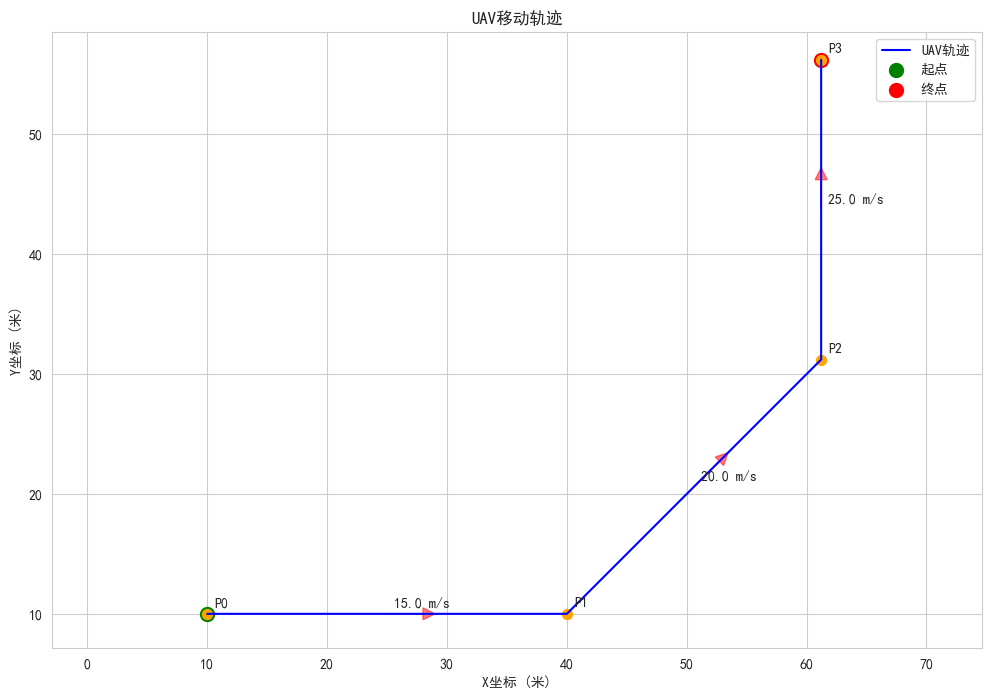


üìä ËΩ®ËøπÁªüËÆ°‰ø°ÊÅØ:
ÊÆµ0: Ë∑ùÁ¶ª = 30.00m, ÈÄüÂ∫¶ = 15.0m/s, Êó∂Èó¥ = 2.0s
ÊÆµ1: Ë∑ùÁ¶ª = 30.00m, ÈÄüÂ∫¶ = 20.0m/s, Êó∂Èó¥ = 1.5s
ÊÆµ2: Ë∑ùÁ¶ª = 25.00m, ÈÄüÂ∫¶ = 25.0m/s, Êó∂Èó¥ = 1.0s
ÊÄªË∑ùÁ¶ª: 85.00m


In [6]:
def test_uav_trajectory():
    """ÊµãËØïUAVËΩ®ËøπËÆ∞ÂΩïÂíåÂèØËßÜÂåñ"""
    # ÂàõÂª∫UAVÂÆû‰æã
    uav = UAV(start_position=(10, 10, 50),
              num_antennas=8,
              max_speed=30.0,
              min_speed=10.0,
              env_bounds=(100, 100, 100))
    
    # Ê®°ÊãüUAVÁßªÂä®Ë∑ØÂæÑ
    # 1. ÂêëÂè≥ÁßªÂä®
    direction1 = np.array([1.0, 0.0])
    # 2. ÂêëÂè≥‰∏äÁßªÂä®
    direction2 = np.array([1.0, 1.0])
    # 3. Âêë‰∏äÁßªÂä®
    direction3 = np.array([0.0, 1.0])
    
    # ÊâßË°åÁßªÂä®
    speeds = [15.0, 20.0, 25.0]
    time_steps = [2.0, 1.5, 1.0]
    directions = [direction1, direction2, direction3]
    
    plt.figure(figsize=(12, 8))
    
    # ËÆ∞ÂΩïÊØèÊ¨°ÁßªÂä®ÂêéÁöÑ‰ΩçÁΩÆ
    positions = [uav.get_position()]
    for direction, speed, time_step in zip(directions, speeds, time_steps):
        uav.move(direction, speed, time_step)
        positions.append(uav.get_position())
    
    # Ëé∑ÂèñÂÆåÊï¥ËΩ®Ëøπ
    trajectory = uav.get_trajectory()
    
    # ÁªòÂà∂ËΩ®Ëøπ
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'b-', label='UAVËΩ®Ëøπ')
    
    # Ê†áËÆ∞Ëµ∑ÁÇπÂíåÁªàÁÇπ
    plt.scatter(trajectory[0, 0], trajectory[0, 1], c='g', s=100, label='Ëµ∑ÁÇπ')
    plt.scatter(trajectory[-1, 0], trajectory[-1, 1], c='r', s=100, label='ÁªàÁÇπ')
    
    # Ê∑ªÂä†ÁßªÂä®ÁÇπÊ†áËÆ∞
    for i, pos in enumerate(positions):
        plt.scatter(pos[0], pos[1], c='orange', s=50)
        plt.annotate(f'P{i}', (pos[0], pos[1]), 
                    xytext=(5, 5), textcoords='offset points')
    
    # Ê∑ªÂä†ÈÄüÂ∫¶ÂêëÈáè
    for i in range(len(positions)-1):
        mid_x = (positions[i][0] + positions[i+1][0]) / 2
        mid_y = (positions[i][1] + positions[i+1][1]) / 2
        dx = positions[i+1][0] - positions[i][0]
        dy = positions[i+1][1] - positions[i][1]
        plt.arrow(mid_x, mid_y, dx/10, dy/10, 
                 head_width=1, head_length=1, fc='red', ec='red', alpha=0.5)
        speed_text = f'{speeds[i]:.1f} m/s'
        plt.annotate(speed_text, (mid_x, mid_y), 
                    xytext=(5, 5), textcoords='offset points')
    
    plt.title('UAVÁßªÂä®ËΩ®Ëøπ')
    plt.xlabel('XÂùêÊ†á (Á±≥)')
    plt.ylabel('YÂùêÊ†á (Á±≥)')
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.show()
    
    # ÊâìÂç∞ËΩ®Ëøπ‰ø°ÊÅØ
    print("\nüìä ËΩ®ËøπÁªüËÆ°‰ø°ÊÅØ:")
    total_distance = 0
    for i in range(len(positions)-1):
        distance = np.linalg.norm(positions[i+1][:2] - positions[i][:2])
        print(f"ÊÆµ{i}: Ë∑ùÁ¶ª = {distance:.2f}m, ÈÄüÂ∫¶ = {speeds[i]:.1f}m/s, Êó∂Èó¥ = {time_steps[i]:.1f}s")
        total_distance += distance
    print(f"ÊÄªË∑ùÁ¶ª: {total_distance:.2f}m")

# ËøêË°åÊµãËØï
test_uav_trajectory()


## 5. Á≥ªÁªüÈõÜÊàêÊµãËØï

### 5.1 UAVÂíåÁî®Êà∑‰∫§‰∫íÊµãËØï
ÊµãËØïUAVÂíåÁî®Êà∑‰πãÈó¥ÁöÑ‰∫§‰∫íÔºö
- UAVÂØπÁî®Êà∑ÁöÑË¶ÜÁõñ
- Ë∑ùÁ¶ªËÆ°ÁÆó
- ËΩ®ËøπËßÑÂàí


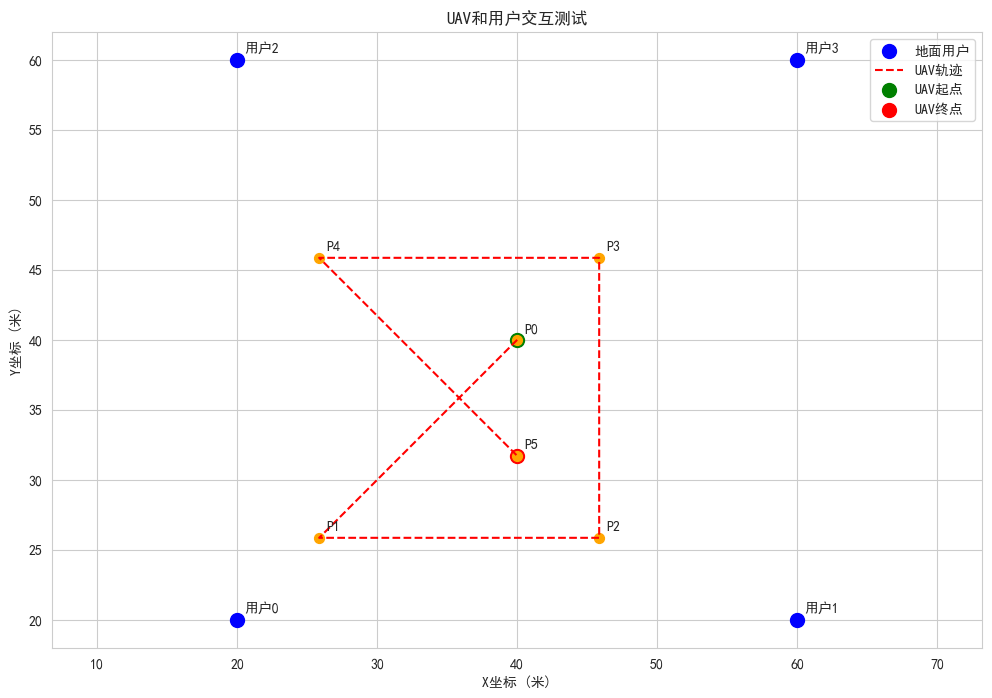


üìä UAVÂà∞Áî®Êà∑ÁöÑË∑ùÁ¶ªÁªüËÆ°:

‰ΩçÁΩÆP0:
  Ëµ∑ÂßãÁÇπ
  Ëµ∑ÂßãÁÇπ
  Ëµ∑ÂßãÁÇπ
  Ëµ∑ÂßãÁÇπ

‰ΩçÁΩÆP1:
  Âà∞Áî®Êà∑0ÁöÑË∑ùÁ¶ª: 50.68m
  Âà∞Áî®Êà∑1ÁöÑË∑ùÁ¶ª: 60.83m
  Âà∞Áî®Êà∑2ÁöÑË∑ùÁ¶ª: 60.83m
  Âà∞Áî®Êà∑3ÁöÑË∑ùÁ¶ª: 69.51m

‰ΩçÁΩÆP2:
  Âà∞Áî®Êà∑0ÁöÑË∑ùÁ¶ª: 56.59m
  Âà∞Áî®Êà∑1ÁöÑË∑ùÁ¶ª: 52.29m
  Âà∞Áî®Êà∑2ÁöÑË∑ùÁ¶ª: 65.84m
  Âà∞Áî®Êà∑3ÁöÑË∑ùÁ¶ª: 62.17m

‰ΩçÁΩÆP3:
  Âà∞Áî®Êà∑0ÁöÑË∑ùÁ¶ª: 61.95m
  Âà∞Áî®Êà∑1ÁöÑË∑ùÁ¶ª: 58.04m
  Âà∞Áî®Êà∑2ÁöÑË∑ùÁ¶ª: 58.04m
  Âà∞Áî®Êà∑3ÁöÑË∑ùÁ¶ª: 53.85m

‰ΩçÁΩÆP4:
  Âà∞Áî®Êà∑0ÁöÑË∑ùÁ¶ª: 56.59m
  Âà∞Áî®Êà∑1ÁöÑË∑ùÁ¶ª: 65.84m
  Âà∞Áî®Êà∑2ÁöÑË∑ùÁ¶ª: 52.29m
  Âà∞Áî®Êà∑3ÁöÑË∑ùÁ¶ª: 62.17m

‰ΩçÁΩÆP5:
  Âà∞Áî®Êà∑0ÁöÑË∑ùÁ¶ª: 55.11m
  Âà∞Áî®Êà∑1ÁöÑË∑ùÁ¶ª: 55.11m
  Âà∞Áî®Êà∑2ÁöÑË∑ùÁ¶ª: 60.83m
  Âà∞Áî®Êà∑3ÁöÑË∑ùÁ¶ª: 60.83m

üì° Ë¶ÜÁõñÂàÜÊûê:
‰ΩçÁΩÆP1: Ë¶ÜÁõñ 0 ‰∏™Áî®Êà∑
‰ΩçÁΩÆP2: Ë¶ÜÁõñ 0 ‰∏™Áî®Êà∑
‰ΩçÁΩÆP3: Ë¶ÜÁõñ 0 ‰∏™Áî®Êà∑
‰ΩçÁΩÆP4: Ë¶ÜÁõñ 0 ‰∏™Áî®Êà∑
‰ΩçÁΩÆP5: Ë¶ÜÁõñ 0 ‰∏™Áî®Êà∑


In [7]:
def test_uav_user_interaction():
    """ÊµãËØïUAVÂíåÁî®Êà∑ÁöÑ‰∫§‰∫í"""
    # ÂàõÂª∫Áî®Êà∑ÁÆ°ÁêÜÂô®ÂíåUAV
    user_manager = UserManager(num_users=4)
    fixed_positions = np.array([
        [20, 20, 0],
        [60, 20, 0],
        [20, 60, 0],
        [60, 60, 0]
    ])
    user_manager.set_fixed_users(fixed_positions)
    
    uav = UAV(start_position=(40, 40, 50),
              num_antennas=8,
              max_speed=30.0,
              min_speed=10.0,
              env_bounds=(100, 100, 100))
    
    # ÂàõÂª∫ÂõæÂΩ¢
    plt.figure(figsize=(12, 8))
    
    # ÁªòÂà∂Áî®Êà∑‰ΩçÁΩÆ
    user_positions = user_manager.get_user_positions()
    plt.scatter(user_positions[:, 0], user_positions[:, 1], 
                c='blue', s=100, label='Âú∞Èù¢Áî®Êà∑')
    for i, pos in enumerate(user_positions):
        plt.annotate(f'Áî®Êà∑{i}', (pos[0], pos[1]), 
                    xytext=(5, 5), textcoords='offset points')
    
    # Ê®°ÊãüUAVÁßªÂä®Âπ∂ËÆ∞ÂΩïËΩ®Ëøπ
    # 1. ËÆøÈóÆÁî®Êà∑0
    direction1 = np.array([20-40, 20-40])  # ÂêëÁî®Êà∑0ÁßªÂä®
    # 2. ËÆøÈóÆÁî®Êà∑1
    direction2 = np.array([60-20, 0])      # ÂêëÁî®Êà∑1ÁßªÂä®
    # 3. ËÆøÈóÆÁî®Êà∑3
    direction3 = np.array([0, 60-20])      # ÂêëÁî®Êà∑3ÁßªÂä®
    # 4. ËÆøÈóÆÁî®Êà∑2
    direction4 = np.array([-40, 0])        # ÂêëÁî®Êà∑2ÁßªÂä®
    # 5. ËøîÂõû‰∏≠ÂøÉ
    direction5 = np.array([40-20, 40-60])  # ËøîÂõû‰∏≠ÂøÉ
    
    directions = [direction1, direction2, direction3, direction4, direction5]
    speeds = [20.0] * len(directions)
    time_steps = [1.0] * len(directions)
    
    # ËÆ∞ÂΩïËΩ®ËøπÁÇπ
    trajectory_points = [uav.get_position()]
    distances_to_users = []
    
    # ÊâßË°åÁßªÂä®Âπ∂ËÆ∞ÂΩïÊï∞ÊçÆ
    for i, (direction, speed, time_step) in enumerate(zip(directions, speeds, time_steps)):
        # Ê†áÂáÜÂåñÊñπÂêëÂêëÈáè
        if np.linalg.norm(direction) > 0:
            direction = direction / np.linalg.norm(direction)
        
        # ÁßªÂä®UAV
        uav.move(direction, speed, time_step)
        current_pos = uav.get_position()
        trajectory_points.append(current_pos)
        
        # ËÆ°ÁÆóÂà∞ÊâÄÊúâÁî®Êà∑ÁöÑË∑ùÁ¶ª
        distances = [user.distance_to(current_pos) for user in user_manager.users]
        distances_to_users.append(distances)
    
    # ÁªòÂà∂UAVËΩ®Ëøπ
    trajectory = np.array(trajectory_points)
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'r--', label='UAVËΩ®Ëøπ')
    plt.scatter(trajectory[0, 0], trajectory[0, 1], c='g', s=100, label='UAVËµ∑ÁÇπ')
    plt.scatter(trajectory[-1, 0], trajectory[-1, 1], c='r', s=100, label='UAVÁªàÁÇπ')
    
    # Ê∑ªÂä†ËΩ®ËøπÁÇπÊ†áËÆ∞
    for i, pos in enumerate(trajectory_points):
        plt.scatter(pos[0], pos[1], c='orange', s=50)
        plt.annotate(f'P{i}', (pos[0], pos[1]), 
                    xytext=(5, 5), textcoords='offset points')
    
    plt.title('UAVÂíåÁî®Êà∑‰∫§‰∫íÊµãËØï')
    plt.xlabel('XÂùêÊ†á (Á±≥)')
    plt.ylabel('YÂùêÊ†á (Á±≥)')
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.show()
    
    # ÊâìÂç∞Ë∑ùÁ¶ª‰ø°ÊÅØ
    print("\nüìä UAVÂà∞Áî®Êà∑ÁöÑË∑ùÁ¶ªÁªüËÆ°:")
    distances_to_users = np.array(distances_to_users)
    for i in range(len(trajectory_points)):
        print(f"\n‰ΩçÁΩÆP{i}:")
        for j in range(len(user_manager.users)):
            print(f"  Âà∞Áî®Êà∑{j}ÁöÑË∑ùÁ¶ª: {distances_to_users[i-1][j]:.2f}m" if i > 0 else "  Ëµ∑ÂßãÁÇπ")
    
    # ËÆ°ÁÆóË¶ÜÁõñÁªüËÆ°
    coverage_radius = 40  # ÂÅáËÆæUAVÁöÑË¶ÜÁõñÂçäÂæÑ‰∏∫40Á±≥
    print("\nüì° Ë¶ÜÁõñÂàÜÊûê:")
    for i in range(len(trajectory_points)):
        if i == 0:
            continue
        covered_users = sum(d <= coverage_radius for d in distances_to_users[i-1])
        print(f"‰ΩçÁΩÆP{i}: Ë¶ÜÁõñ {covered_users} ‰∏™Áî®Êà∑")

# ËøêË°åÊµãËØï
test_uav_user_interaction()
